In [2]:
from sklearn.linear_model import LinearRegression
import random

import sys

sys.path.append("..")

import utils.plotting as plotting
import utils.utils as utils
from utils.data_loaders import get_wake_datasets
from utils.evaluation import evaluate_model

In [5]:
FACTORS_FOLDER = "discr_factors_x2_30_y-2_2_step0.125_TIstep0.01_CTstep0.01"
DATA_FOLDER = f"../data/{FACTORS_FOLDER}/"
# INPUT_VAR_TO_TRAIN_REDUCTION_FACTOR = {'ti': 4, 'ct': 4}
# train_reduc_factor_string = "training_factors=" + "-".join([f"{k}{v}" for k, v in INPUT_VAR_TO_TRAIN_REDUCTION_FACTOR.items()])
INPUT_VAR_TO_TRAIN_RANGES = {"ti": [(0.15, 0.4)], "ct": [(0.3, 0.7)]}
train_range_string = "training_ranges=" + "-".join(
    [
        f"{var}{r[0]}-{r[1]}"
        for var, ranges in INPUT_VAR_TO_TRAIN_RANGES.items()
        for r in ranges
    ]
)
MODEL_NAME = f"multivariate_LR_{train_range_string}"
# BEST_MODEL_PATH = f"saved_models/{FACTORS_FOLDER}/{MODEL_NAME}.pt"

MODEL_DESCRIPTION = MODEL_NAME + "_" + FACTORS_FOLDER

CONSIDER_WS = False
COORDS_AS_INPUT = False  # multivariate

In [6]:
valid_dataset = None
train_dataset, valid_dataset, test_dataset = get_wake_datasets(
    DATA_FOLDER,
    consider_ws=CONSIDER_WS,
    coords_as_input=COORDS_AS_INPUT,
    # train_perc=0.7,
    # test_perc=0.3,
    # validation_perc=0,
    input_var_to_train_ranges=INPUT_VAR_TO_TRAIN_RANGES,
)
train_x, train_y = train_dataset.inputs, train_dataset.outputs
test_x, test_y = test_dataset.inputs, test_dataset.outputs
print("Train shapes: ", train_x.shape, train_y.shape)
print("Test shapes: ", test_x.shape, test_y.shape)

if valid_dataset is not None:
    valid_x, valid_y = valid_dataset.inputs, valid_dataset.outputs
    print("Valid shapes: ", valid_x.shape, valid_y.shape)

/Users/niccolomorabito/Library/CloudStorage/GoogleDrive-morabito.1808746@studenti.uniroma1.it/My Drive/BDMA/Semester4 Thesis/Ainslie-surrogate/learning notebooks/../utils/data_loaders.py:328: UserWarning: 
Ignoring percentages of train-valid-test split (train_perc=0.8, valid_perc=0, test_perc=0.2)
and using the following ranges for the training set instead:
{'ti': [(0.15, 0.4)], 'ct': [(0.3, 0.7)]}
  warnings.warn(


# Training

In [4]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

# Evaluation and testing

In [5]:
# evaluation on trainset
evaluate_model(
    model,
    data=(train_x, train_y),
    data_type="train",
    model_description=MODEL_DESCRIPTION,
    save_results=True,
)

print()

# evalution on testset
evaluate_model(
    model,
    data=(test_x, test_y),
    data_type="test",
    model_description=MODEL_DESCRIPTION,
    save_results=True,
)

Train results for multivariate_LR_training_ranges=ti0.15-0.4-ct0.3-0.7_discr_factors_x2_30_y-2_2_step0.125_TIstep0.01_CTstep0.01
r2_score=0.9664489049084948
explained_variance_score=0.9664489054370539
mean_squared_error=2.7563551157072652e-06
mean_absolute_error=0.0007990032318048179
median_absolute_error=0.0006602372159250081
mean_absolute_percentage_error=0.23755396902561188
Prediction time=7.064400649652249e-05s

Test results for multivariate_LR_training_ranges=ti0.15-0.4-ct0.3-0.7_discr_factors_x2_30_y-2_2_step0.125_TIstep0.01_CTstep0.01
r2_score=0.18807918416113326
explained_variance_score=0.5492846746762682
mean_squared_error=0.0005836411146447062
mean_absolute_error=0.011408858932554722
median_absolute_error=0.008874875493347645
mean_absolute_percentage_error=2514626543616.0
Prediction time=1.781648465124573e-05s


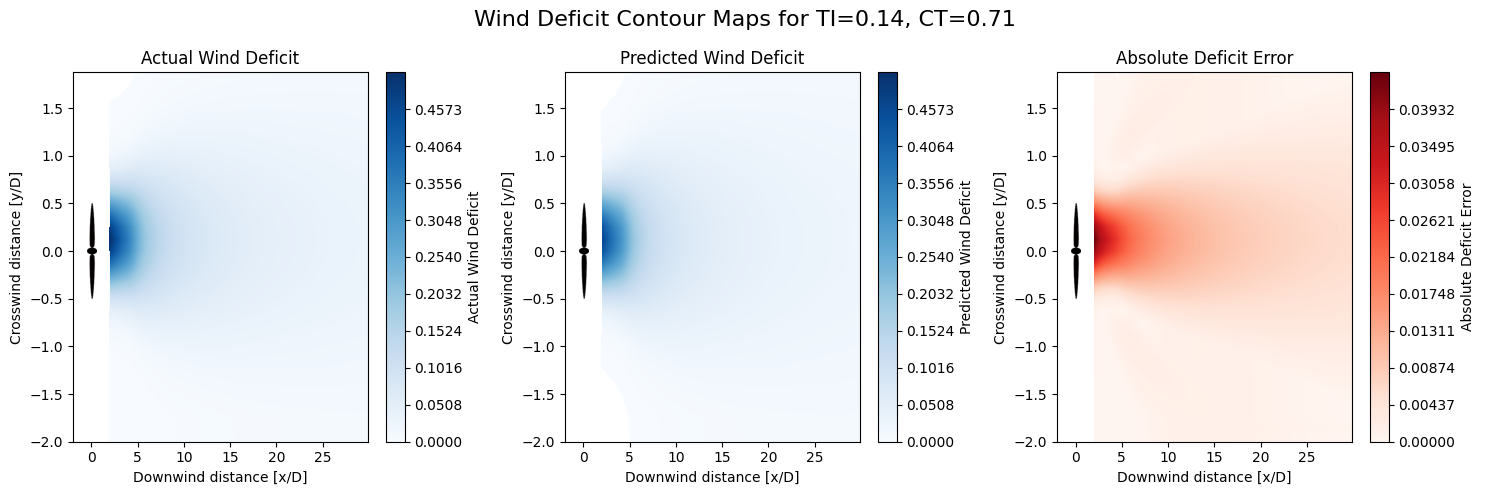

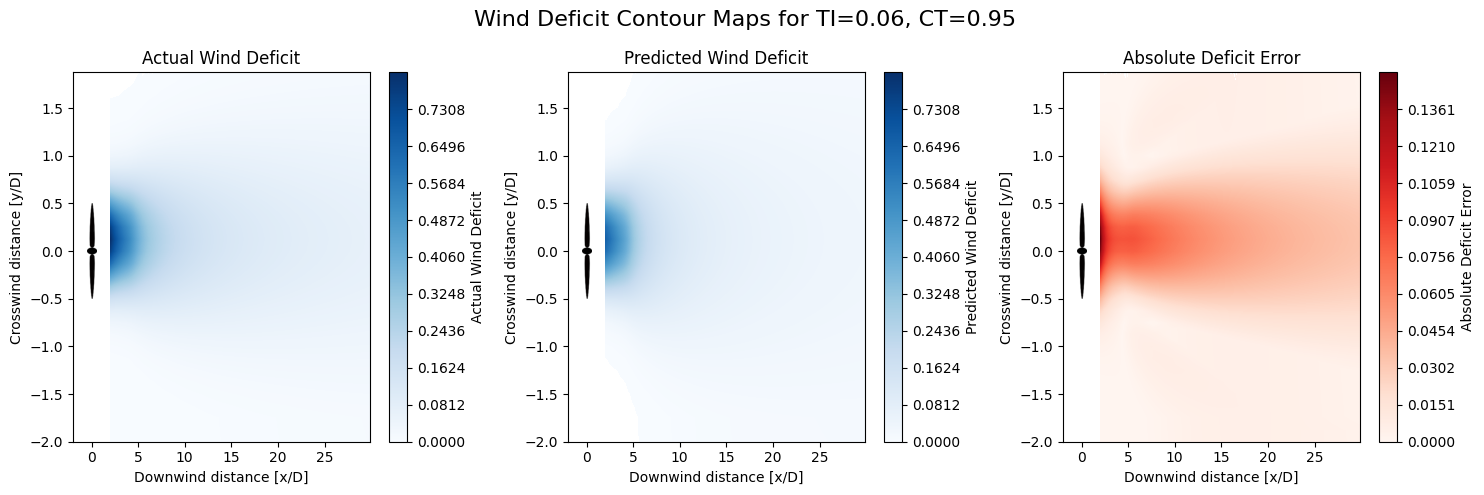

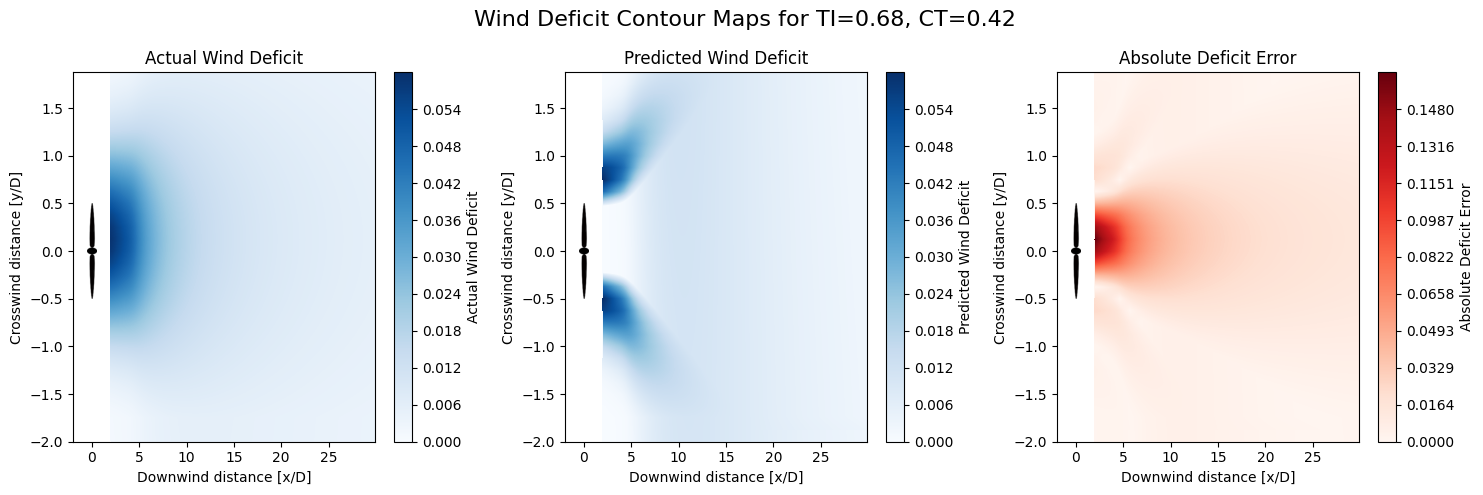

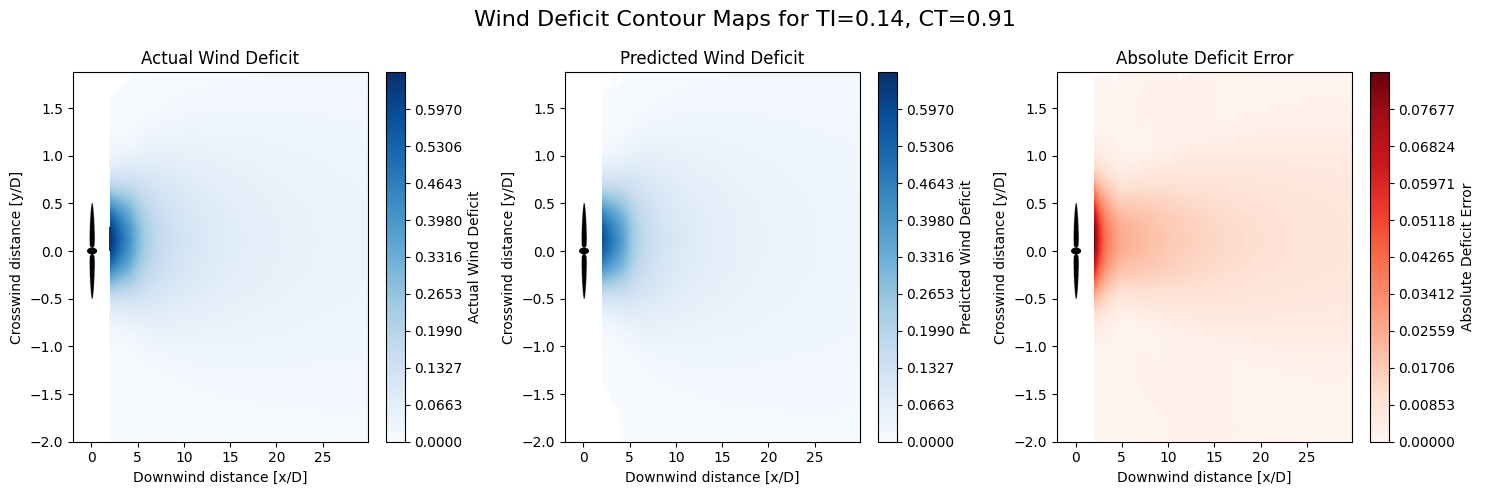

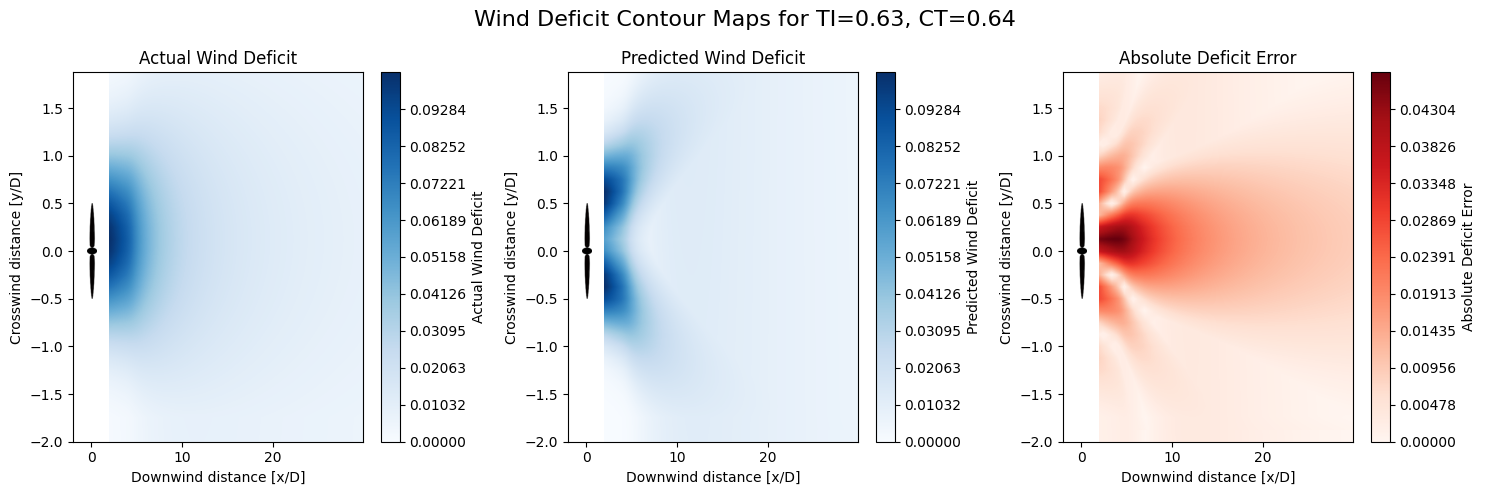

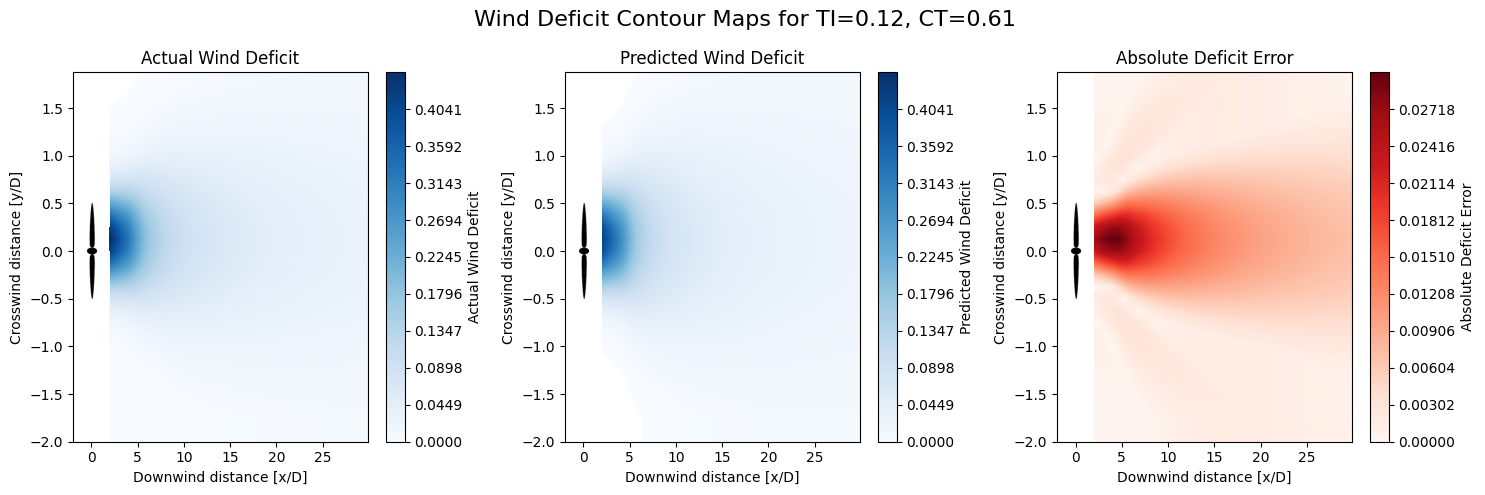

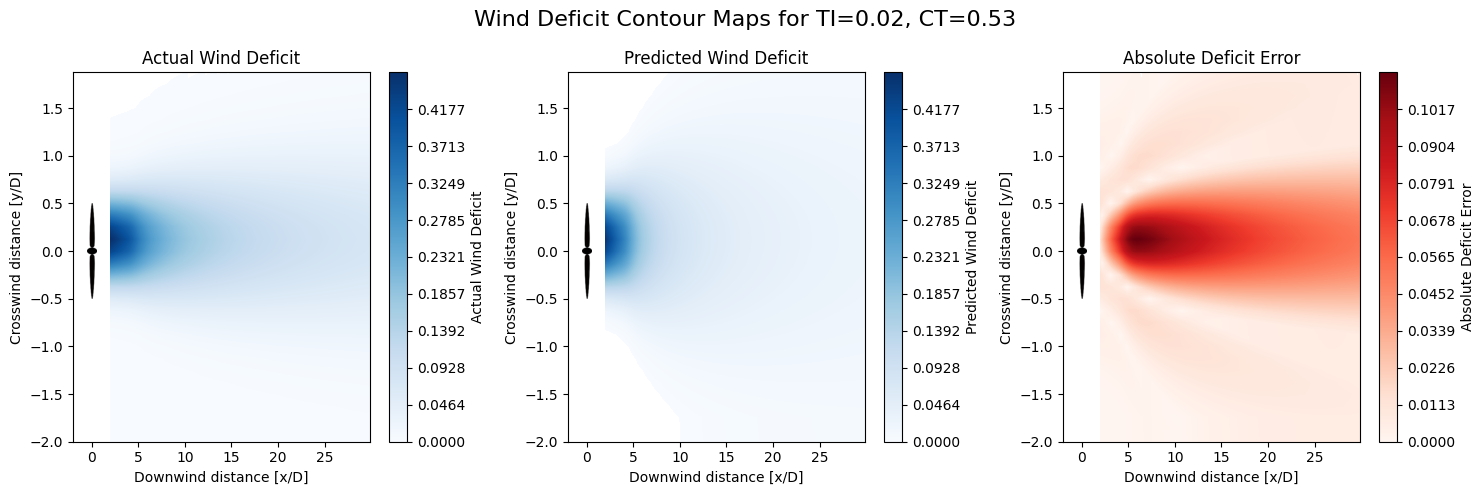

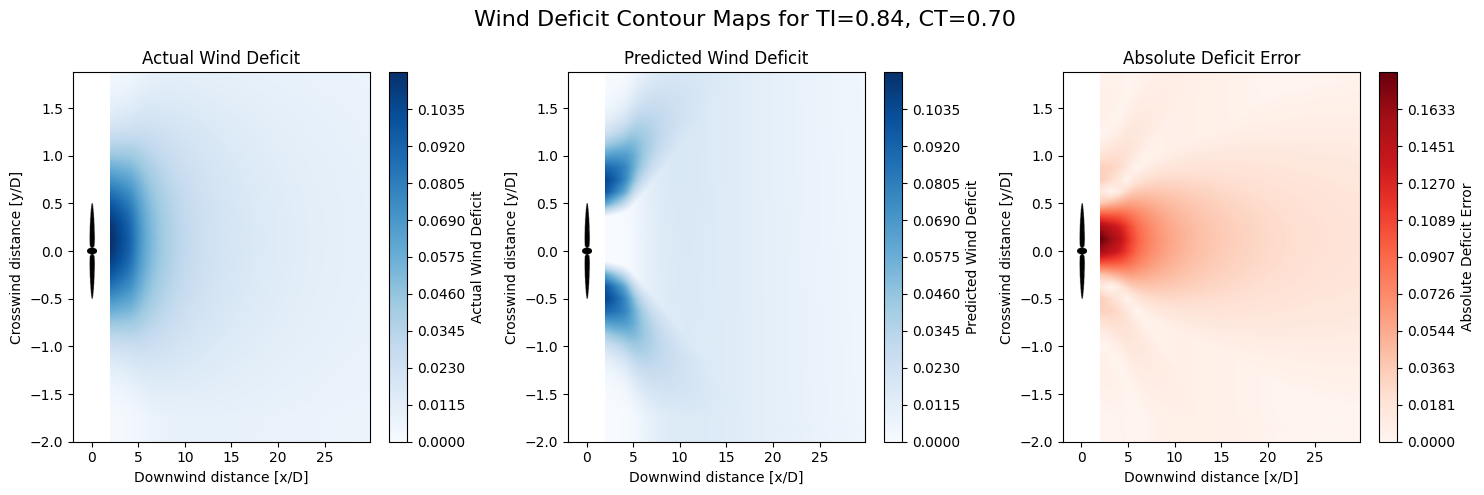

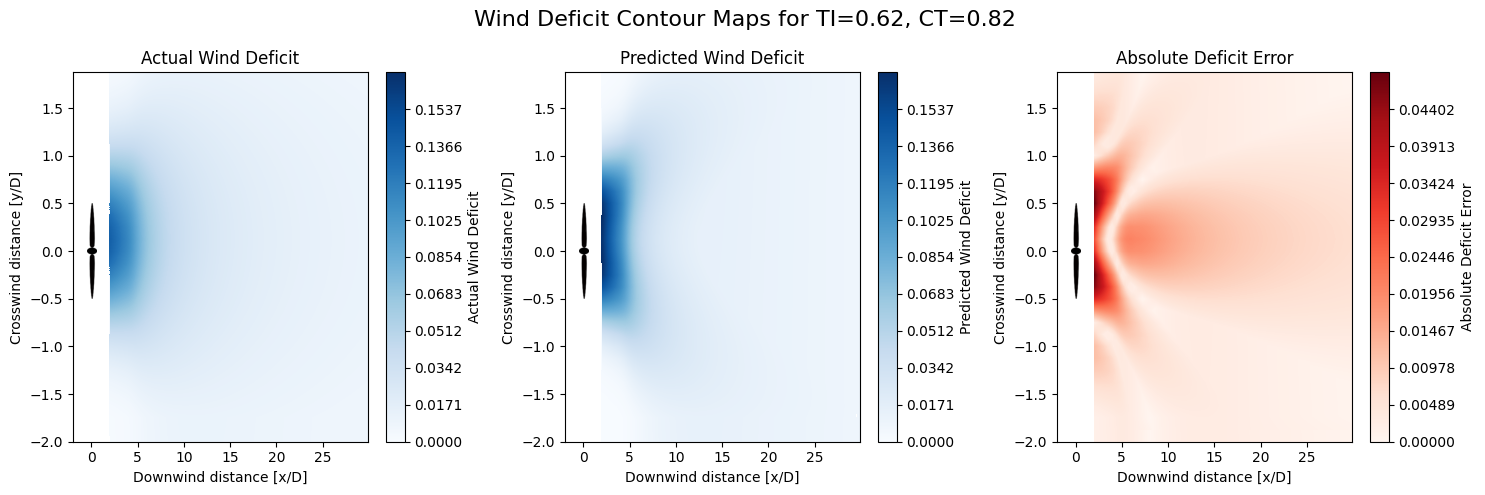

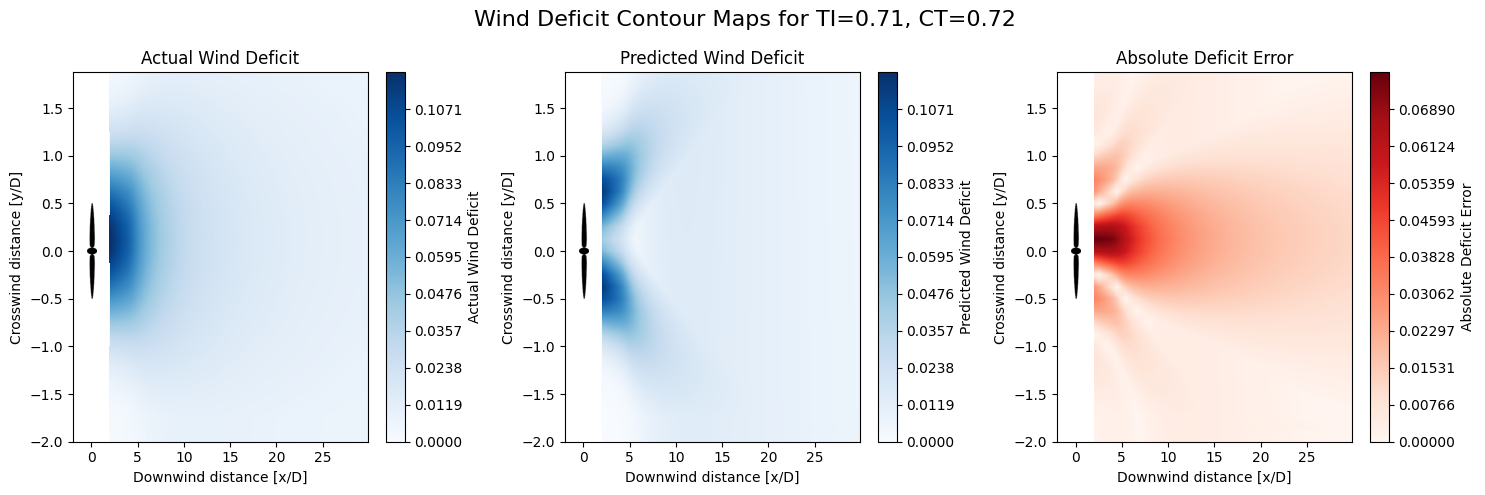

In [6]:
indices = list(range(len(test_dataset)))
random.shuffle(indices)

for idx in indices[:10]:
    ti, ct, ws, wake_field, predicted_wake_field = (
        test_dataset.get_parameters_for_plotting_multivariate(model, idx)
    )
    plotting.plot_maps(
        test_dataset.X_grid,
        test_dataset.Y_grid,
        wake_field,
        predicted_wake_field,
        ti,
        ct,
        ws,
        error_to_plot="absolute",
    )